In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

In [2]:
df= pd.read_csv("telco.csv")

In [3]:
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [4]:
df.shape

(7043, 50)

In [5]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

## Data Cleaning

##### checking for missing values

In [7]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

In [8]:
print(df['Customer Status'].unique()) 

['Churned' 'Stayed' 'Joined']


Offer,Internet Type,Churn Category,Churn Reason are the columns with missing values.

For churn category and churn reason if the customer status is stayed or joined value is no churn

In [9]:
df['Offer'] = df['Offer'].fillna("No Offer")
df['Internet Type']=df['Internet Type'].fillna("Unknown")

#Churn Category:
# for non churned customers
df.loc[df['Customer Status'].isin(['Stayed', 'Joined']), 'Churn Category'] = 'No Churn'
# For churned customers
df.loc[(df['Customer Status'] == 'Churned') & (df['Churn Category'].isna()), 'Churn Category'] = 'Unknown'

#Churn Reason
# for non churned customers
df.loc[df['Customer Status'].isin(['Stayed', 'Joined']), 'Churn Reason'] = 'No Churn'
# for churned customers
df.loc[(df['Customer Status'] == 'Churned') & (df['Churn Reason'].isna()), 'Churn Reason'] = 'Unknown'

In [10]:
df.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Under 30                             0
Senior Citizen                       0
Married                              0
Dependents                           0
Number of Dependents                 0
Country                              0
State                                0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Population                           0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download  

##### check for duplicate values

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

## EDA

##### Churn Distribution

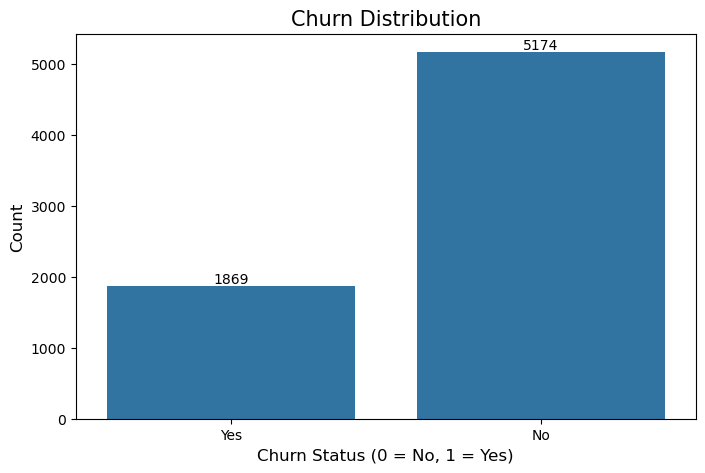

In [13]:
plt.figure(figsize=(8, 5))
ax=sns.countplot(x='Churn Label', data=df)
ax.bar_label(ax.containers[0])
plt.title('Churn Distribution', fontsize=15)
plt.xlabel('Churn Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
 

In [14]:
#converting churn label into binary
df['Churn Label']=df['Churn Label'].apply(lambda x: 1 if x == 'Yes' else 0)

In [15]:
# calculating churn rate
churn_rate = df['Churn Label'].mean() * 100
print(f"Churn Rate: {churn_rate:.1f}%")

Churn Rate: 26.5%


Churn Distribution:
  Non-Churned= 5174 customers ,
Churned = 1869 customers

Churn Rate = 26.5% which represents moderate imbalance

##### CLTV VS Churn Analysis

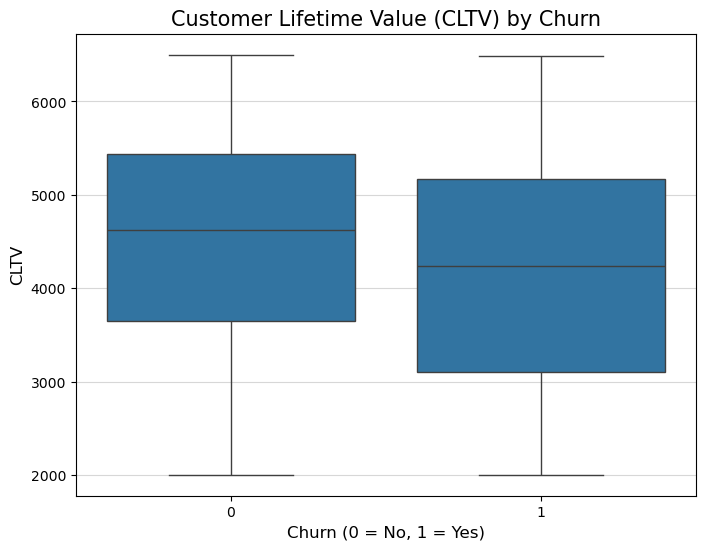

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn Label', y='CLTV', data=df)
plt.title('Customer Lifetime Value (CLTV) by Churn', fontsize=15)
plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('CLTV', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()


In [17]:
# obtaining the median values of both boxplots
print(df.groupby('Churn Label')['CLTV'].median())

Churn Label
0    4620.0
1    4238.0
Name: CLTV, dtype: float64


Therefore the customer lifetime vale is around $400 less for the churned customers so go for retention plans that will not cost more than this amount 


> ##### the overall loss in customer lifetime value is around 4238 x 1869 =$7.9M 

##### Correlation Heatmap

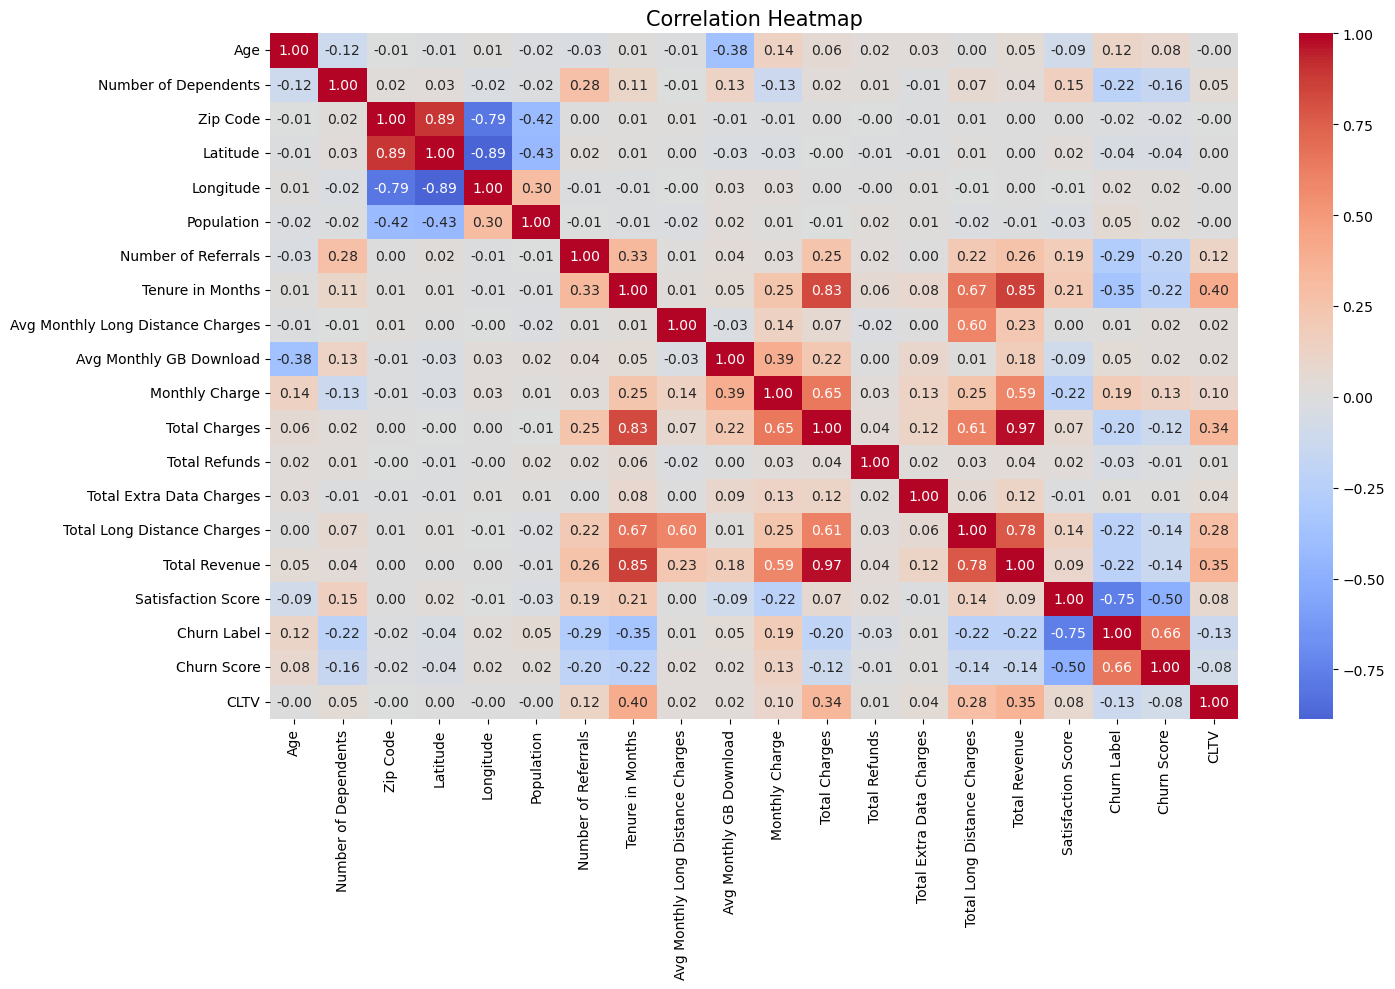

In [18]:
plt.figure(figsize=(15, 10))
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap', fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

1. Customers with lower satisfaction (-0.75), shorter tenure (-0.35), and fewer referrals (-0.29) are most likely to churn.

2. Churned customers have slightly lower CLTV (-0.13), suggesting mid-value customers are at higher risk.

3. Higher-spending customers (Total Revenue: -0.22) churn less, Thus focus should be on retaining high-value segments.

4. Long-distance users (Total Long Distance Charges: -0.22) are less likely to leave—consider bundling these services.

5. Boost satisfaction and loyalty programs for long-tenured customers to reduce attrition.

C:\Users\bhavy\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\bhavy\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


                         CLTV  Tenure in Months  Monthly Charge
Customer_Segment                                               
0                 4297.526071         21.715549       29.087011
1                 3613.570322         16.227477       78.707358
2                 5280.961916         58.005324       82.132903


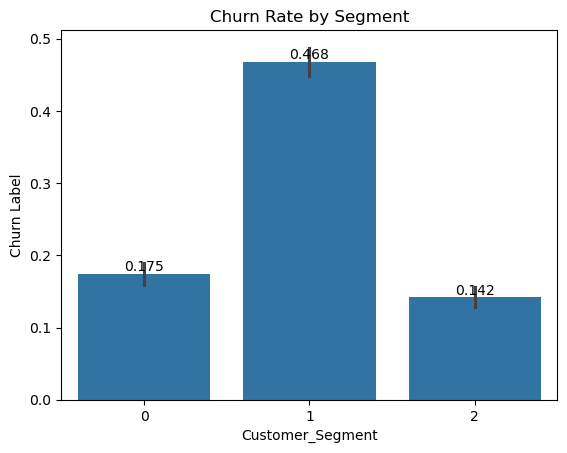

In [19]:
#Segmentation via KMeans

seg_cols = ['CLTV', 'Tenure in Months', 'Monthly Charge']
seg_scaled = StandardScaler().fit_transform(df[seg_cols])

kmeans = KMeans(n_clusters=3, random_state=42)
df['Customer_Segment'] = kmeans.fit_predict(seg_scaled)

# See average stats for each group
group_stats = df.groupby('Customer_Segment')[['CLTV', 'Tenure in Months', 'Monthly Charge']].mean()
print(group_stats)

#plotting segment-wise churn
ax=sns.barplot(x='Customer_Segment', y='Churn Label', data=df)
ax.bar_label(ax.containers[0],fmt='%.3f')
plt.title("Churn Rate by Segment")
plt.show()

-Segment 0: 

Long-term customers ($29/month) with moderate loyalty (17.5% churn).

Not leaving often, but unlikely to spend more without incentives.

grow Segment 0 maybe through gentle upsells or provide small perks for tenure milestones

-Segment 1: 

Pay $78/month but leave fastest (46.7% churn), hurting revenue.

High spend but low CLTV suggests they’re on wrong plans or dissatisfied.

Fix Segment 1 try emergency retention programs

-Segment 2:

Highest spend ($82) and loyalty (14% churn), driving long-term profit.

Happy long-tenured customers (5+ years) can attract similar high-value users

protect Segment 2 by avoiding price hikes or plan changes


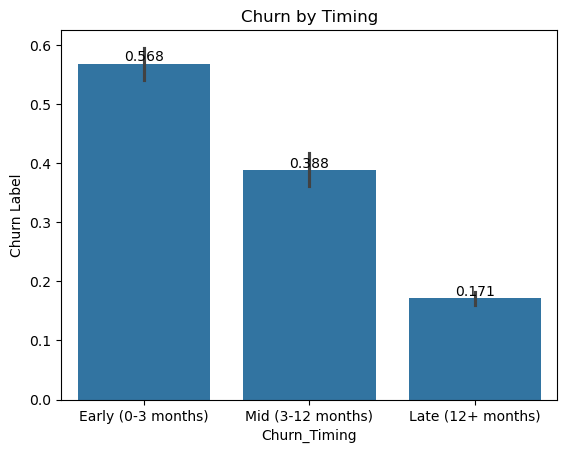

In [20]:
#Churn by Timing
df['Churn_Timing'] = pd.cut(df['Tenure in Months'], bins=[0, 3, 12, 100], 
                           labels=['Early (0-3 months)', 'Mid (3-12 months)', 'Late (12+ months)'])
ax=sns.barplot(x='Churn_Timing', y='Churn Label', data=df)
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.title('Churn by Timing')
plt.show()

1. Early Stage (0-3 months) has around 56% Churn which shows critical Onboarding Failure

Over half of new customers leave immediately, indicating broken first impressions or unmet promises.

Simplify signup flows and add a first-week success progress rewards.

2. Mid Stage (3-12 months) has 38.7% Churn as customers don’t see enough long-term value.

Launch a "3-month check-in" offer to re-engage users before they lapse

3. Late Stage (12+ months) has 17.12% Churn showcasing healthy Retention thus we know loyal customers stay so focus on nurturing these high-value relationships.

Upsell premium features or ask for referrals with rewards

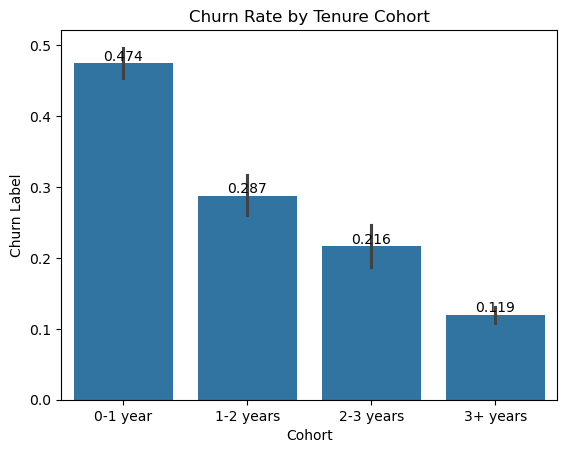

In [21]:
# Tenure based cohorts
df['Cohort'] = pd.cut(df['Tenure in Months'], bins=[0, 12, 24, 36, 100], 
                     labels=['0-1 year', '1-2 years', '2-3 years', '3+ years'])
ax=sns.barplot(x='Cohort', y='Churn Label', data=df)
ax.bar_label(ax.containers[0],fmt='%.3f')
plt.title('Churn Rate by Tenure Cohort')
plt.show()

1. 0-1 Year Cohort (47% Churn): 
Price Shock Risk: Often occurs when introductory pricing ends

Compare churn rates for promo vs. non-promo signups

2. 1-2 Year Cohort(28% Churn):
Engagement Drop: Product fatigue sets in

introduce "Anniversary upgrade" campaign at 22 months

3. 2-3 Year Cohort(21.6% Churn):
Proven Value: Customers clearly find your product useful

Reduce churn further with personalized check-ins

4. 3+ Year Cohort (11.9% Churn):
this is the most profitable segment

Focus on referrals & premium upsells

### Model Building

In [22]:
#Feature Engineering 
#Converting categorical features into binary columns (one-hot encoding) 
categ_cols = ['Gender', 'Under 30', 'Senior Citizen', 'Married', 
              'Phone Service', 'Multiple Lines', 'Internet Service', 
              'Contract', 'Paperless Billing', 'Payment Method']
df = pd.get_dummies(df, columns=categ_cols, drop_first=True)

In [23]:
#Revenue calculations
df['Total_Revenue'] = df['Monthly Charge'] * df['Tenure in Months']
df['CLTV_per_year'] = df['CLTV'] / (df['Tenure in Months'] / 12 + 1)

In [24]:
#Converting Yes/No columns into binary columns
yn_cols = ['Referred a Friend', 'Online Security', 'Online Backup', 
           'Device Protection Plan', 'Premium Tech Support', 
           'Streaming TV', 'Streaming Movies', 'Streaming Music', 
           'Unlimited Data']
df[yn_cols] = df[yn_cols].apply(lambda x: x.str.lower().map({'yes':1, 'no':0}))

X = df.drop(['Churn Label', 'Churn Category', 'Churn Reason', 'Customer Status'], axis=1)
y = df['Churn Label']
X = X.apply(pd.to_numeric, errors='coerce')



In [25]:

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [26]:
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))


C:\Users\bhavy\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1009
           1       0.97      0.95      0.96       400

    accuracy                           0.98      1409
   macro avg       0.98      0.97      0.97      1409
weighted avg       0.98      0.98      0.98      1409



In [27]:
# Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=5,
    class_weight='balanced_subsample',
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1009
           1       0.95      0.95      0.95       400

    accuracy                           0.97      1409
   macro avg       0.97      0.97      0.97      1409
weighted avg       0.97      0.97      0.97      1409



Both models achieve 95% recall for churn cases (class 1), meaning they correctly identify 19 out of every 20 customers who would leave. This enables highly effective retention campaigns.

XGBoost outperforms Random Forest with:2% higher precision on churn predictions (97% vs 95%) and 1% better F1-score (96% vs 95%) i.e fewer false positives.The 97% precision indicates only 3% of retention offers would go to non-churners

In [32]:
print("Top 10 Features:")
print(pd.Series(rf.feature_importances_, index=X.columns)
       .sort_values(ascending=False).head(10))

Top 10 Features:
Satisfaction Score         0.339095
Churn Score                0.285592
Contract_Two Year          0.052499
Number of Referrals        0.046016
Tenure in Months           0.029153
CLTV_per_year              0.026810
Monthly Charge             0.022235
Number of Dependents       0.019219
Avg Monthly GB Download    0.016158
Total Revenue              0.015861
dtype: float64


Satisfaction Score and Churn Score are the most significant predictors of the target variable, with strong influence on the outcome.

Contract type, tenure, and customer engagement (referrals, dependents, and monthly charge) are moderately important in shaping predictions.

Customer behavior metrics like CLTV, revenue, and usage patterns (e.g., data downloads) contribute to the model, but with lower importance.

In [37]:
#To create dashboards on Tableau
df_export = df[[ 'CLTV', 'CLTV_per_year', 'Tenure in Months', 'Monthly Charge',
    'Customer_Segment', 'Churn Label', 'Churn Score',
    'Churn Category', 'Churn Reason', 'Contract_One Year', 'Contract_Two Year',
    'Paperless Billing_Yes', 'Internet Service_Yes', 'Phone Service_Yes',
    'Multiple Lines_Yes', 'Online Security', 'Online Backup',
    'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
    'Streaming Movies', 'Streaming Music', 'Unlimited Data',
     'Satisfaction Score', 'Total Revenue',
    'Total_Revenue', 'Offer', 'Internet Type', 'Quarter', 'Gender_Male',
    'Under 30_Yes', 'Senior Citizen_Yes', 'Married_Yes', 'State', 'City', 'Country'
]]
df_export.to_csv("customer_churn_tableau.csv", index=False)
